In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils import read_classification_dataset, features_histograms_mean_std
# import sklearn
from sklearnex import patch_sklearn
from sklearn.calibration import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

import joblib

from kneed import KneeLocator

patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [26]:
model = Pipeline([
      ('Scaler', StandardScaler()),
      ('Imputer', KNNImputer()),
      ('PCA', PCA(n_components=24)),
      ('KNN', KNeighborsClassifier())
    ])
param_grid = [
    {
        "Imputer": [SimpleImputer(strategy="mean")],
        "KNN__n_neighbors":[1,3,7,21],
        "KNN": [KNeighborsClassifier(weights="distance")]
    },
    {
        "Imputer": [KNNImputer(weights='distance')],
        "Imputer__n_neighbors":[1,3,7,21],
        "KNN__n_neighbors":[1,3,7,21],
        "KNN": [KNeighborsClassifier(weights="distance")]
    },

]

grid = GridSearchCV(model, param_grid, scoring="f1_weighted", n_jobs=-1)
train, target, test = read_classification_dataset(1)
X, y = train.values, target.values.flatten()
grid.fit(X, y)
grid.best_estimator_

c:\Users\Morri\Documents\Notebooks\ML\Project


c:\Users\Morri\Documents\Notebooks\ML\.venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Pipeline(steps=[('Scaler', StandardScaler()),
                ('Imputer', KNNImputer(n_neighbors=1, weights='distance')),
                ('PCA', PCA(n_components=24)),
                ('KNN',
                 KNeighborsClassifier(n_neighbors=3, weights='distance'))])

In [27]:
print(grid.best_score_)
print(grid.best_params_)
prediction = grid.best_estimator_.predict(test.values)
display(prediction)

0.9616363636363635
{'Imputer': KNNImputer(weights='distance'), 'Imputer__n_neighbors': 1, 'KNN': KNeighborsClassifier(weights='distance'), 'KNN__n_neighbors': 3}


array([2, 1, 1, 1, 1, 2, 1, 1, 3, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4,
       3, 3, 4, 1, 5, 4, 1, 3, 1, 1, 4, 1, 1, 1, 1, 4, 3, 1, 1, 1, 4, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [28]:
res = grid.cv_results_
param_scores = list((zip(res["rank_test_score"],res["mean_test_score"],res["params"], )))
param_scores.sort(key=lambda x: x[0])
param_scores

[(1,
  0.9616363636363635,
  {'Imputer': KNNImputer(weights='distance'),
   'Imputer__n_neighbors': 1,
   'KNN': KNeighborsClassifier(weights='distance'),
   'KNN__n_neighbors': 3}),
 (1,
  0.9616363636363635,
  {'Imputer': KNNImputer(weights='distance'),
   'Imputer__n_neighbors': 3,
   'KNN': KNeighborsClassifier(weights='distance'),
   'KNN__n_neighbors': 3}),
 (3,
  0.9517138830162086,
  {'Imputer': SimpleImputer(),
   'KNN': KNeighborsClassifier(weights='distance'),
   'KNN__n_neighbors': 3}),
 (3,
  0.9517138830162086,
  {'Imputer': KNNImputer(weights='distance'),
   'Imputer__n_neighbors': 7,
   'KNN': KNeighborsClassifier(weights='distance'),
   'KNN__n_neighbors': 3}),
 (3,
  0.9517138830162086,
  {'Imputer': KNNImputer(weights='distance'),
   'Imputer__n_neighbors': 21,
   'KNN': KNeighborsClassifier(weights='distance'),
   'KNN__n_neighbors': 3}),
 (6,
  0.9419393939393939,
  {'Imputer': SimpleImputer(),
   'KNN': KNeighborsClassifier(weights='distance'),
   'KNN__n_neighbor

              precision    recall  f1-score   support

           1       0.74      1.00      0.85       108
           2       1.00      0.14      0.25        14
           3       1.00      0.09      0.17        11
           4       1.00      0.14      0.25        14
           5       0.00      0.00      0.00         3

    accuracy                           0.75       150
   macro avg       0.75      0.28      0.30       150
weighted avg       0.80      0.75      0.67       150



c:\Users\Morri\Documents\Notebooks\ML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Morri\Documents\Notebooks\ML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Morri\Documents\Notebooks\ML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

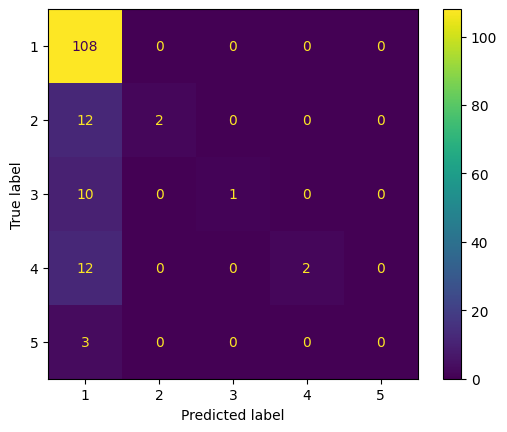

In [31]:
best_model_path = './models/c_1_Scale_KNNI(1)_PCA(24)_KNN(3).pkl'
joblib.dump(grid.best_estimator_, best_model_path)
best_model = joblib.load(best_model_path)
pred = best_model.predict(X)
print(classification_report(y, pred))
fig = ConfusionMatrixDisplay.from_predictions(y, pred)

In [37]:
model = Pipeline([
      ('Scaler', StandardScaler()),
      ('Imputer', KNNImputer()),
      ('GB', GradientBoostingClassifier(random_state=30))
    ])
"""loss: Literal['log_loss', 'deviance', 'exponential'] = "log_loss",
    learning_rate: Float = 0.1,
    n_estimators: Int = 100,
    subsample: Float = 1,
    criterion: Literal['friedman_mse', 'squared_error'] = "friedman_mse",
    min_samples_split: float | int = 2,
    min_samples_leaf: float | int = 1,
    min_weight_fraction_leaf: Float = 0,
    max_depth: int | None = 3,
    min_impurity_decrease: Float = 0,
    init: str | BaseEstimator | None = None,
    random_state: Int | RandomState | None = None,
    max_features: float | int | Literal['auto', 'sqrt', 'log2'] | None = None,
    verbose: Int = 0,
    max_leaf_nodes: Int | None = None,
    warm_start: bool = False,
    validation_fraction: Float = 0.1,
    n_iter_no_change: Int | None = None,
    tol: Float = 0.0001,
    ccp_alpha: float = 0"""
param_grid = [
    {
        "Imputer": [SimpleImputer(strategy="mean")],
        "GB__n_estimators":[100, 150],
        "GB":[AdaBoostClassifier(random_state=30), GradientBoostingClassifier(random_state=30)]

    },
    {
        "Imputer": [KNNImputer(weights='distance')],
        "Imputer__n_neighbors":[1,3],
        "GB__n_estimators":[100, 150],
        "GB":[AdaBoostClassifier(random_state=30), GradientBoostingClassifier(random_state=30)]
    },
]

grid = GridSearchCV(model, param_grid, scoring="f1_weighted", n_jobs=-1)
grid.fit(X, y)
print(grid.best_score_)
print(grid.best_params_)
prediction = grid.best_estimator_.predict(test.values)
display(prediction)
res = grid.cv_results_
param_scores = list((zip(res["rank_test_score"],res["mean_test_score"],res["params"], )))
param_scores.sort(key=lambda x: x[0])

c:\Users\Morri\Documents\Notebooks\ML\.venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


0.9170831917044941
{'GB': GradientBoostingClassifier(random_state=30), 'GB__n_estimators': 150, 'Imputer': KNNImputer(weights='distance'), 'Imputer__n_neighbors': 3}


array([2, 1, 1, 1, 1, 2, 1, 1, 3, 1, 3, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 4,
       3, 3, 4, 1, 5, 4, 1, 3, 1, 1, 4, 1, 1, 1, 1, 4, 3, 5, 1, 1, 4, 1,
       1, 1, 1, 1, 1, 1, 1, 5, 1], dtype=int64)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       108
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00         3

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



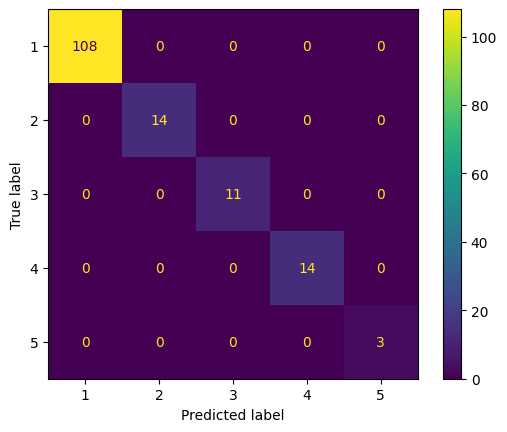

In [38]:
best_model_path = './models/c_1_Scale_KNN(3)_GB(150).pkl'
joblib.dump(grid.best_estimator_, best_model_path)
best_model = joblib.load(best_model_path)
pred = best_model.predict(X)
print(classification_report(y, pred))
fig = ConfusionMatrixDisplay.from_predictions(y, pred)

In [39]:
param_scores

[(1,
  0.9170831917044941,
  {'GB': GradientBoostingClassifier(random_state=30),
   'GB__n_estimators': 150,
   'Imputer': KNNImputer(weights='distance'),
   'Imputer__n_neighbors': 3}),
 (2,
  0.9138309339239571,
  {'GB': GradientBoostingClassifier(random_state=30),
   'GB__n_estimators': 100,
   'Imputer': SimpleImputer()}),
 (2,
  0.9138309339239571,
  {'GB': GradientBoostingClassifier(random_state=30),
   'GB__n_estimators': 150,
   'Imputer': SimpleImputer()}),
 (4,
  0.9123390056579825,
  {'GB': GradientBoostingClassifier(random_state=30),
   'GB__n_estimators': 150,
   'Imputer': KNNImputer(weights='distance'),
   'Imputer__n_neighbors': 1}),
 (5,
  0.9053337827210426,
  {'GB': GradientBoostingClassifier(random_state=30),
   'GB__n_estimators': 100,
   'Imputer': KNNImputer(weights='distance'),
   'Imputer__n_neighbors': 3}),
 (6,
  0.900589596674531,
  {'GB': GradientBoostingClassifier(random_state=30),
   'GB__n_estimators': 100,
   'Imputer': KNNImputer(weights='distance'),
 

In [45]:
model = Pipeline([
        ("Imputer", SimpleImputer(strategy="mean")),
        ('Scaler', StandardScaler()),
        ('PCA', PCA(n_components=24)),
        ('GB', GradientBoostingClassifier(random_state=30))
    ])
param_grid = [{
        "PCA__n_components":list(range(20, 28)),
        "GB__n_estimators":[75, 100, 150, 200, 250],
    },]

grid = GridSearchCV(model, param_grid, scoring="f1_weighted", n_jobs=-1, verbose=1)
grid.fit(X, y)
print(grid.best_score_)
print(grid.best_params_)
prediction = grid.best_estimator_.predict(test.values)
display(prediction)
res = grid.cv_results_
param_scores = list((zip(res["rank_test_score"],res["mean_test_score"],res["params"], )))
param_scores.sort(key=lambda x: x[0])
param_scores

c:\Users\Morri\Documents\Notebooks\ML\.venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


0.898303118839487
{'GB__n_estimators': 100, 'PCA__n_components': 27}


array([2, 1, 1, 1, 1, 2, 1, 1, 3, 2, 3, 1, 1, 3, 4, 1, 1, 1, 1, 1, 1, 4,
       3, 3, 4, 1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 3, 1, 1, 1, 4, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

[(1, 0.898303118839487, {'GB__n_estimators': 100, 'PCA__n_components': 27}),
 (2, 0.8926047061410742, {'GB__n_estimators': 100, 'PCA__n_components': 25}),
 (3, 0.8920351232691658, {'GB__n_estimators': 75, 'PCA__n_components': 20}),
 (3, 0.8920351232691658, {'GB__n_estimators': 75, 'PCA__n_components': 22}),
 (5, 0.8908828289844145, {'GB__n_estimators': 75, 'PCA__n_components': 27}),
 (5, 0.8908828289844145, {'GB__n_estimators': 150, 'PCA__n_components': 24}),
 (5, 0.8908828289844145, {'GB__n_estimators': 150, 'PCA__n_components': 25}),
 (8, 0.8885286297626724, {'GB__n_estimators': 75, 'PCA__n_components': 24}),
 (9, 0.888017195909479, {'GB__n_estimators': 250, 'PCA__n_components': 26}),
 (10, 0.8869905628581058, {'GB__n_estimators': 200, 'PCA__n_components': 27}),
 (11, 0.8851844162860019, {'GB__n_estimators': 100, 'PCA__n_components': 20}),
 (12, 0.8831779804120229, {'GB__n_estimators': 100, 'PCA__n_components': 23}),
 (13, 0.8827793093156775, {'GB__n_estimators': 200, 'PCA__n_compone

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       108
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00         3

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



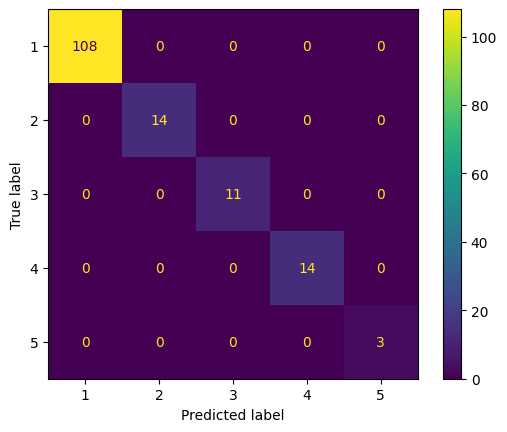

In [46]:
# best_model_path = './models/c_1_Scale_Simple_PCA(2)_GB(200).pkl'
# joblib.dump(grid.best_estimator_, best_model_path)
# best_model = joblib.load(best_model_path)
pred = grid.best_estimator_.predict(X)
print(classification_report(y, pred))
fig = ConfusionMatrixDisplay.from_predictions(y, pred)